In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Import packages for data preprocessing

# Import packages for data modeling
import sagemaker
import sys
import boto3
from time import gmtime, strftime
from pathlib import Path

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
sess = boto3.Session()
sm = sess.client('sagemaker')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [12]:


s3 = boto3.resource('s3')
for buckets in s3.buckets.all():
    if 'aws1sentiment' in buckets.name:
        bucket = buckets.name
print("Bucket: ", bucket)
prefix = 'data'
output_path = 's3://{}/{}/output'.format(bucket, prefix)

# Configure the training paths
train_path = f"s3://{bucket}/{prefix}/twitter_training.csv"
validation_path = f"s3://{bucket}/{prefix}/twitter_validation.csv"
print(train_path)
print(validation_path)
print('s3://aws1sentiment/data/twitter_training.csv')

Bucket:  aws1sentiment
s3://aws1sentiment/data/twitter_training.csv
s3://aws1sentiment/data/twitter_validation.csv
s3://aws1sentiment/data/twitter_training.csv


In [13]:
print('hi')

hi


In [22]:
data_train = pd.read_csv(train_path, header= None)
data_val = pd.read_csv(validation_path, header= None)
data_train = data_train.rename(columns = {0: 'tweetID', 1:'entity', 2:'sentiment', 3:'tweet_text'})
data_train.head()

,tweetID,entity,sentiment,tweet_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
data_val = data_val.rename(columns = {0: 'tweetID', 1:'entity', 2:'sentiment', 3:'tweet_text'})
data_val.head()

,tweetID,entity,sentiment,tweet_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [24]:
print(data_train.shape)
print(data_val.shape)

(74682, 4)
(1000, 4)


In [25]:
data_val['sentiment'].value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [26]:
data_train['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [30]:

data_train['entity'].value_counts()


entity
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        2304
GrandTheftAuto(GTA)        

In [31]:
sns.histplot(data=data_train, x='entity', stat="count", multiple="dodge")
plt.

SyntaxError: invalid syntax (2046263276.py, line 1)

In [35]:
!pip install seaborn

import seaborn as sns



Text(0.5, 1.0, 'distribution')

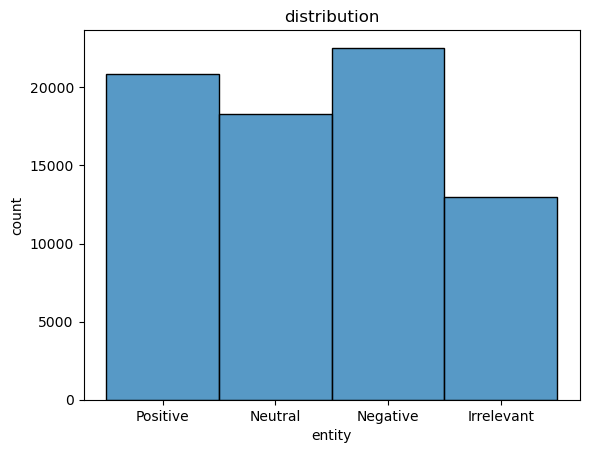

In [39]:
sns.histplot(data=data_train, x='sentiment', stat="count", multiple="dodge")
plt.xlabel('entity')
plt.ylabel('count')
plt.title('distribution')